In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import string
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
data = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv',)

In [3]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
  data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


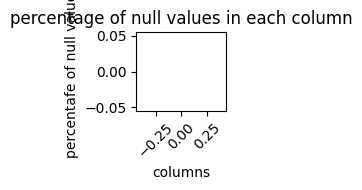

In [7]:
# Palette
color=['#221f1f', '#b20710', '#e50914','#f5f5f1']
plt.figure(figsize=(2,2))
plt.bar(range(0,1), range(0,1), color=color, label='Non-Null Values')
plt.xlabel('columns')
plt.ylabel("percentafe of null values")
plt.title("percentage of null values in each column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Missing Data**

## *Finding missing data*

In [8]:
isnull_sum=data.isnull().sum().reset_index()
isnull_sum.columns=['features', 'sum']
print(isnull_sum)

        features   sum
0        show_id     0
1           type     0
2          title     0
3       director  2634
4           cast   825
5        country   831
6     date_added    10
7   release_year     0
8         rating     4
9       duration     3
10     listed_in     0
11   description     0


In [9]:
null_percent=isnull_sum['sum'] / len(data) * 100
print(null_percent)

0      0.000000
1      0.000000
2      0.000000
3     29.908028
4      9.367549
5      9.435676
6      0.113546
7      0.000000
8      0.045418
9      0.034064
10     0.000000
11     0.000000
Name: sum, dtype: float64


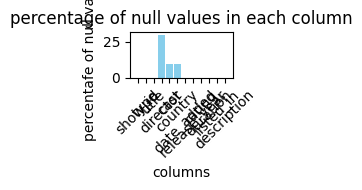

In [10]:
plt.figure(figsize=(2,2))
plt.bar(isnull_sum['features'], null_percent.values, color='skyblue', label='Non-Null Values')
plt.xlabel('columns')
plt.ylabel("percentafe of null values")
plt.title("percentage of null values in each column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## *Replacing null values*

In [11]:
data[['director', 'cast', 'country']]=data[['director', 'cast', 'country']].replace(np.nan, 'No Data')
data.dropna(inplace=True)
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


## *Handling Duplicates*

In [12]:
data['rating'].value_counts().head(5)

rating
TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
Name: count, dtype: int64

In [13]:
data['listed_in'].value_counts()

listed_in
Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: count, Length: 513, dtype: int64

## Number of movies per year

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
Name: count, dtype: int64


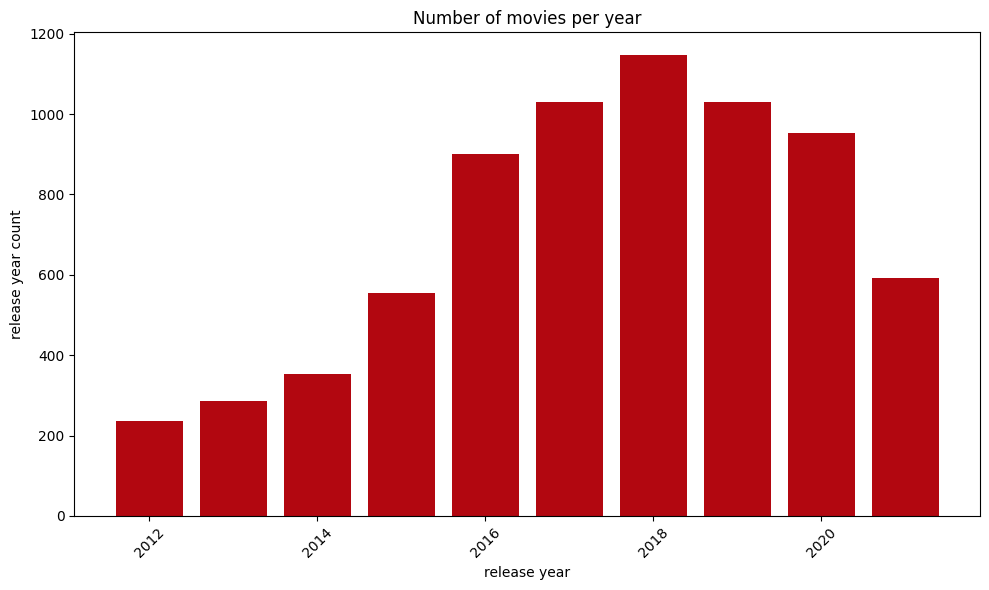

In [14]:
release_year_count=data['release_year'].value_counts().head(10)
print(release_year_count)
plt.figure(figsize=(10,6))
plt.bar(release_year_count.index, release_year_count.values, color='#b20710',)
plt.xlabel("release year")
plt.ylabel("release year count")
plt.title("Number of movies per year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Number of movies per country

country
United States                             2809
India                                      972
No Data                                    829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64


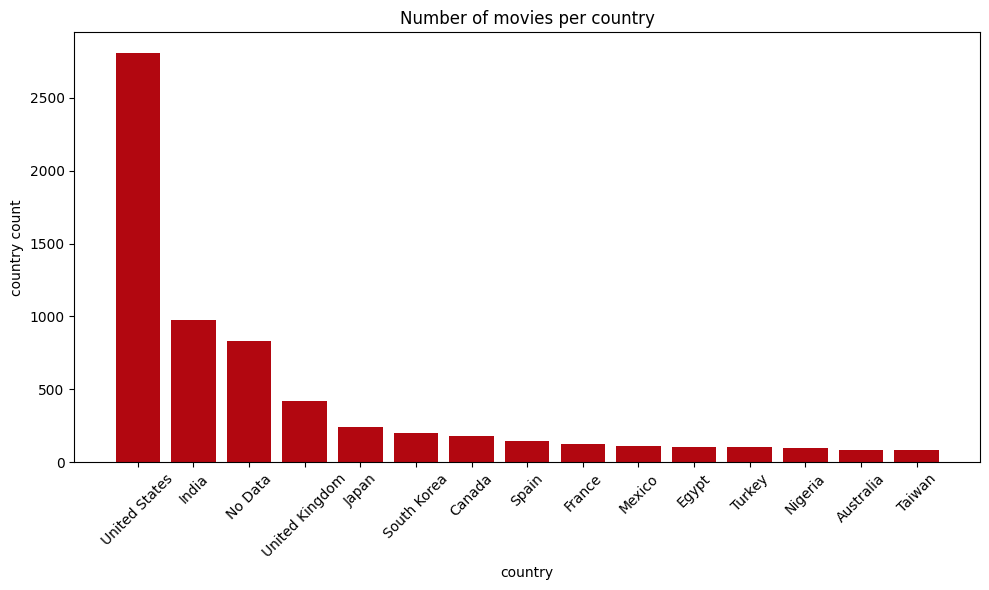

In [15]:
counts=data['country'].value_counts()
country_counts=counts.head(15)
print(counts)
plt.figure(figsize=(10,6))
plt.bar(country_counts.index, country_counts.values,  color='#b20710',)
plt.xlabel("country")
plt.ylabel("country count")
plt.title("Number of movies per country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
data[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


# **handling dates**

In [18]:
data['date_added'].head(5)

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [19]:
data['date_added']=data['date_added'].str.strip()

In [20]:
data["date_added"]=pd.to_datetime(data['date_added'])

In [21]:
data["date_added"].head(4)

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
Name: date_added, dtype: datetime64[ns]

# **Data Exploration**

## *Movie Type*

In [22]:
type_counts=data['type'].value_counts()
print(type_counts)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


In [23]:
# Ratio of movies and TV shows

type_ratio=(type_counts/len(data)).round(2)
print(type_ratio)

type
Movie      0.7
TV Show    0.3
Name: count, dtype: float64


In [24]:
transparse_ratio=pd.DataFrame(type_ratio).T
print(transparse_ratio)

type   Movie  TV Show
count    0.7      0.3


In [25]:
transparse_ratio.columns

Index(['Movie', 'TV Show'], dtype='object', name='type')

In [26]:
transparse_ratio.values[0]

array([0.7, 0.3])

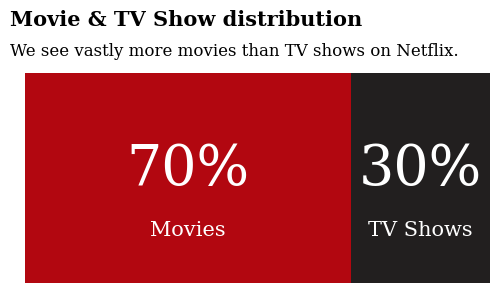

In [27]:
fig, ax= plt.subplots(1,1, figsize=(6,3))

ax.barh(transparse_ratio.index, transparse_ratio['Movie'],color="#b20710")
ax.barh(transparse_ratio.index, transparse_ratio['TV Show'],color="#221f1f",left=transparse_ratio['Movie'])

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticks([])

# annotation for movies
ax.annotate(f"{int(transparse_ratio['Movie']['count']*100)}%",
           xy=(transparse_ratio['Movie']['count']/2, 0.03),
           color='white', va='center', ha='center', fontsize=40,fontfamily='serif',)
ax.annotate("Movies",
           xy=(transparse_ratio['Movie']['count']/2, -0.2),
            va="center", ha="center", fontsize=15, color="white",fontfamily='serif',
           )

# annotation for TV shows
ax.annotate(f"{int(transparse_ratio['TV Show']['count']*100)}%",
           xy=(transparse_ratio['Movie']['count']+(transparse_ratio['TV Show']['count']/2), 0.03),
            color='white', va='center', ha='center', fontsize=40, fontfamily='serif',)
ax.annotate('TV Shows',
           xy=(transparse_ratio['Movie']['count']+(transparse_ratio['TV Show']['count']/2), -0.2),
            color='white', va='center', ha='center', fontsize=15, fontfamily='serif',)

# Title and Subtitle
fig.text(0.1,1, "Movie & TV Show distribution", fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.1, 0.9, 'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)

# hiding the border
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_visible(False)

ax.legend().set_visible(False)
plt.show()

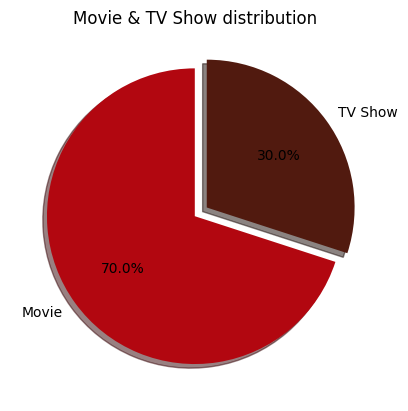

In [28]:
explode=(0,0.1)
plt.pie(transparse_ratio.values[0],colors=["#b20710","#511a0f"], 
        labels=transparse_ratio.columns,autopct='%1.1f%%', explode=explode,
        shadow=True, startangle=90,textprops=dict(color="black"))
plt.title("Movie & TV Show distribution")
plt.show()

## *Movie Title*

In [29]:
data['title']

0        Dick Johnson Is Dead
1               Blood & Water
2                   Ganglands
3       Jailbirds New Orleans
4                Kota Factory
                ...          
8802                   Zodiac
8803              Zombie Dumb
8804               Zombieland
8805                     Zoom
8806                   Zubaan
Name: title, Length: 8790, dtype: object

In [30]:
# Generate Statistical Count Feartures
punc=string.punctuation
data['title_word_count']=data['title'].apply(lambda x: len(x.split()))
data['title_char_count']=data['title'].apply(lambda x: len(x.replace(" ","")))
data['punc_count']=data['title'].apply(lambda x: len([a for a in x if a in punc]))
print(data[['title_word_count', 'title_char_count', 'punc_count']].head(10))

   title_word_count  title_char_count  punc_count
0                 4                17           0
1                 3                11           1
2                 1                 9           0
3                 3                19           0
4                 2                11           0
5                 2                12           0
6                 6                27           1
7                 1                 7           0
8                 5                25           0
9                 2                11           0


In [31]:
data.describe()

,date_added,release_year,title_word_count,title_char_count,punc_count
count,8790,8790.000000,8790.000000,8790.000000,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163,3.109784,15.609329,0.354608
min,2008-01-01 00:00:00,1925.000000,1.000000,1.000000,0.000000
25%,2018-04-06 00:00:00,2013.000000,2.000000,9.000000,0.000000
50%,2019-07-03 00:00:00,2017.000000,3.000000,13.000000,0.000000
75%,2020-08-19 18:00:00,2019.000000,4.000000,20.000000,1.000000
max,2021-09-25 00:00:00,2021.000000,17.000000,88.000000,9.000000
std,NaN,8.825466,1.861059,8.933697,0.676784


In [32]:
def plot_bar(x_data=[], y_data=[], x_label="", y_label="", title="",text_offset=150, show_text=False, x_fig=5, y_fig=4):
    plt.figure(figsize=(x_fig,y_fig))
    bars=plt.bar(x_data,y_data,color="#b20710")

    # Adding Text Annotation to display values on bars
    if show_text:
        for bar in bars:
            height=bar.get_height()
            plt.text(bar.get_x()+bar.get_width()/2.0,
                    height+text_offset,
                    f"{height}",
                    ha='center',  # Horizontal alignment
                    va='top',  # Vertical alignment
                    color='black',  # Text color
                    fontsize=10
                    )

    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    # plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    plt.xticks(x_data, rotation=45)
    plt.tight_layout()
    plt.show()

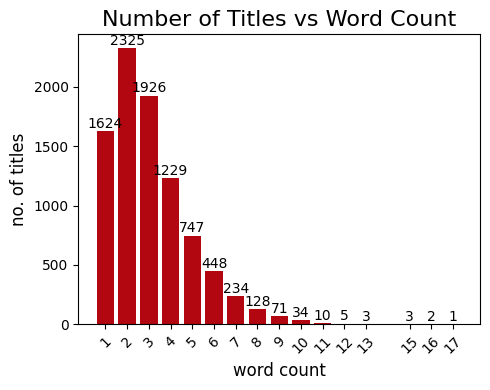

In [33]:
# word count vs no of titles
word_count=data.groupby('title_word_count').size()
word_x=word_count.index
word_y=word_count.values
title="Number of Titles vs Word Count"
x_label="word count"
y_label="no. of titles"
plot_bar(word_x,word_y,x_label,y_label,title,120,True,5,4)

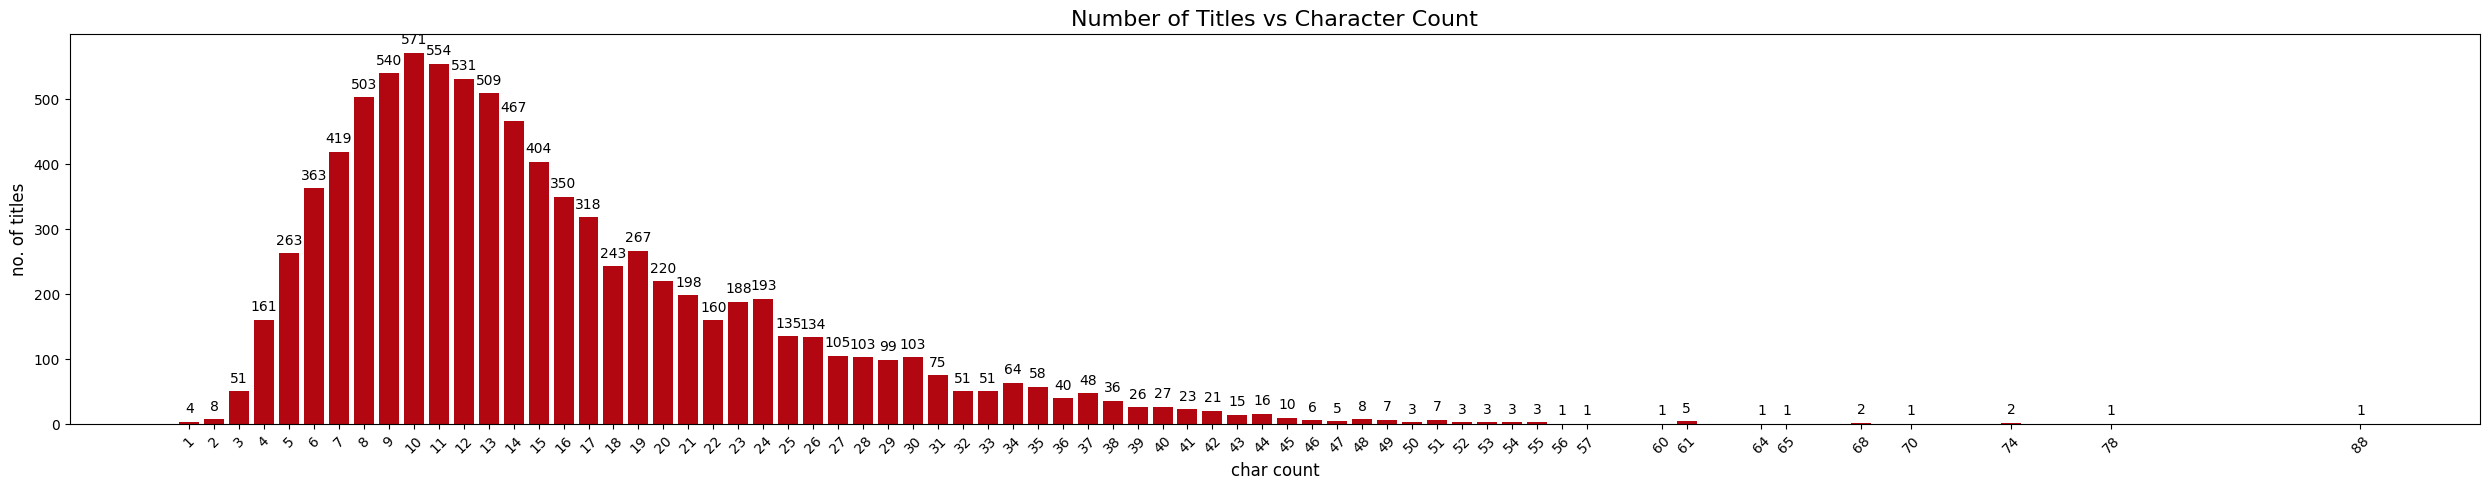

In [34]:
# displaying Char Count
char_count= data.groupby('title_char_count').size()
x_char=char_count.index
y_char=char_count.values 
title="Number of Titles vs Character Count"
x_label="char count"
y_label="no. of titles"
plot_bar(x_char,y_char,x_label,y_label,title,30, True, 25,5)

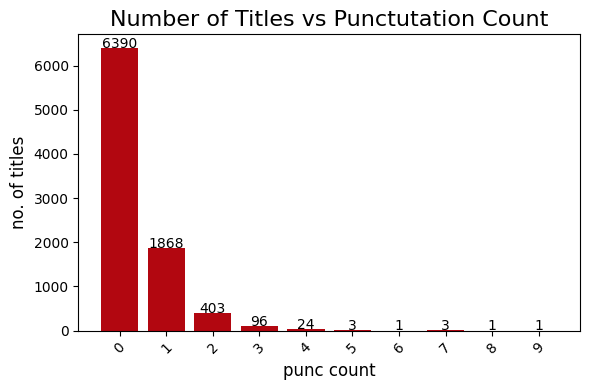

In [35]:
# displaying punctutation
punc_counting=data.groupby('punc_count').size()
x_punc=punc_counting.index
y_punc=punc_counting.values 
title="Number of Titles vs Punctutation Count"
x_label="punc count"
y_label="no. of titles"
plot_bar(x_punc,y_punc,x_label,y_label,title,250, True, 6,4)

## *Directors*

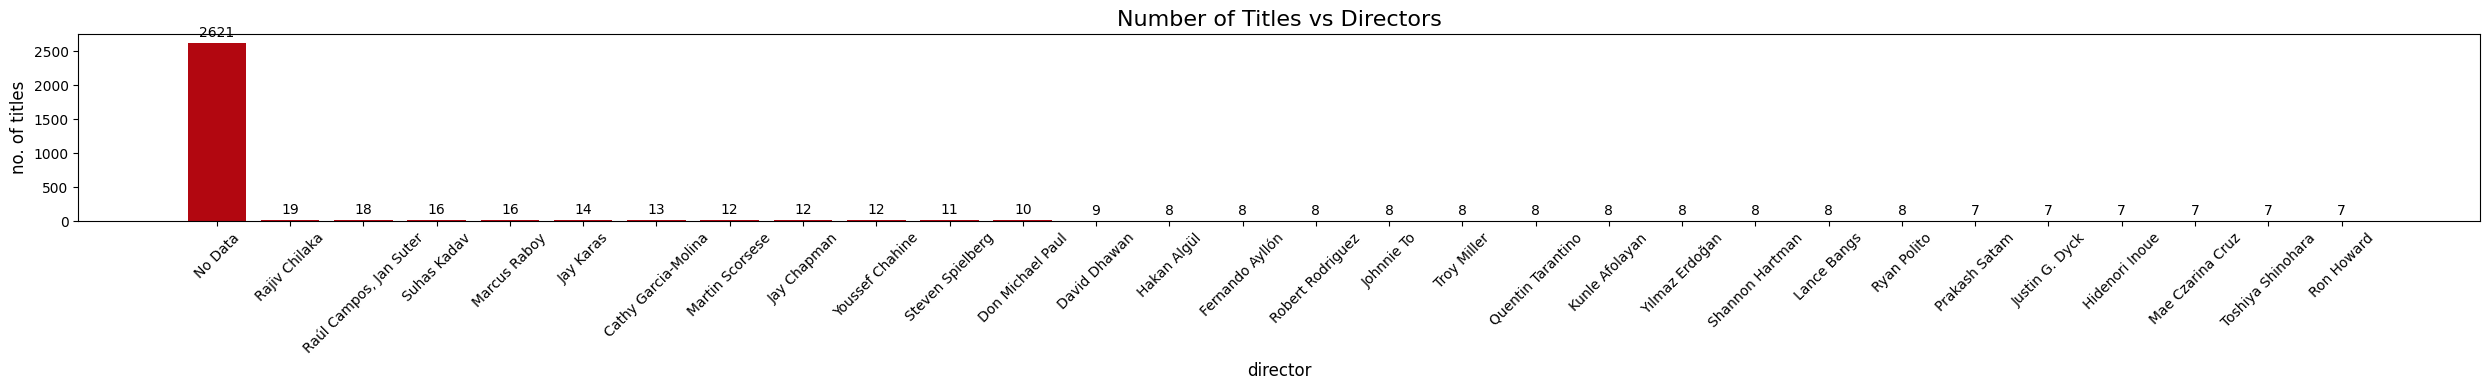

In [36]:
# Showing director count
director_count=data['director'].value_counts().head(30)
x_direc=director_count.index
y_direc=director_count.values 
title="Number of Titles vs Directors"
x_label="director"
y_label="no. of titles"
plot_bar(x_direc,y_direc,x_label,y_label,title,250, True, 25,4)

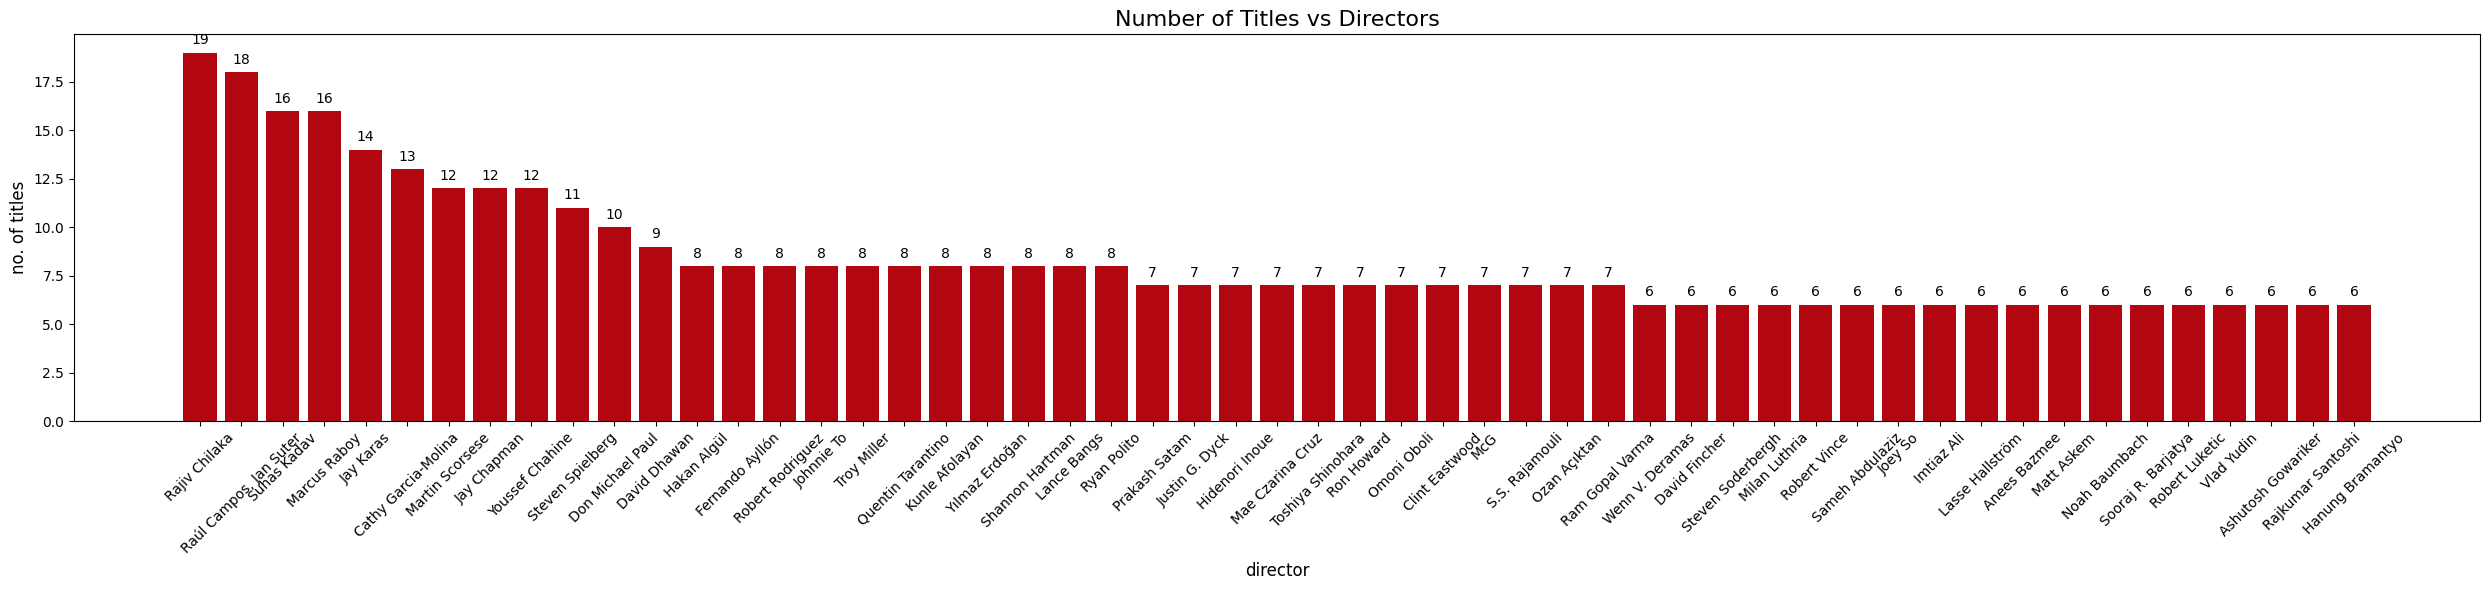

In [37]:
# Showing director count with No Data
dir_count1=data['director'].value_counts()
dir_count2=dir_count1[dir_count1.index!="No Data"]
director_count=dir_count2[dir_count2.values>5]
x_direc=director_count.index
y_direc=director_count.values 
title="Number of Titles vs Directors"
x_label="director"
y_label="no. of titles"
plot_bar(x_direc,y_direc,x_label,y_label,title,1, True, 25,6)

In [38]:
def plot_line(x_data=[],y_data=[], title="", x_label="", y_label="", x_fig=5, y_fig=4 ):
    plt.figure(figsize=(x_fig,y_fig))
    
    plt.plot(x_data,y_data, color="#b20710")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    plt.xticks(ticks=range(min(x_data), max(x_data)+1, 1)) 
    plt.tight_layout()
    plt.show()
    

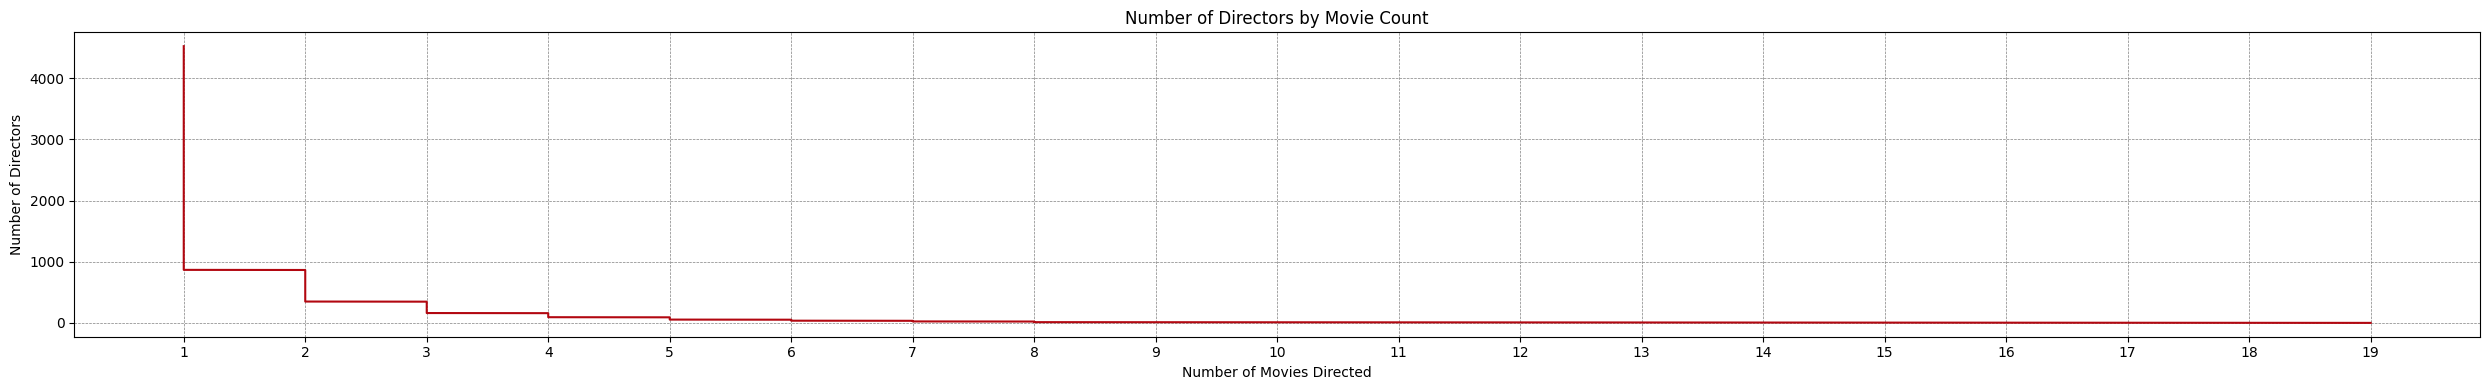

In [39]:
# Multiple movies of a director
movie_direc_count=data['director'].value_counts()
x_movie_direc=movie_direc_count[movie_direc_count.index!="No Data"].values
y_movie_direc=range(1,len(data['director'].value_counts().index))
title="Number of Directors by Movie Count"
x_label="Number of Movies Directed"
y_label="Number of Directors"
plot_line(x_movie_direc,y_movie_direc,title,x_label,y_label,25,4)

## *Cast*

In [40]:
data['cast_length']=data['cast'].apply(lambda x: len(x.split(",")) if x != "No Data" else 0)

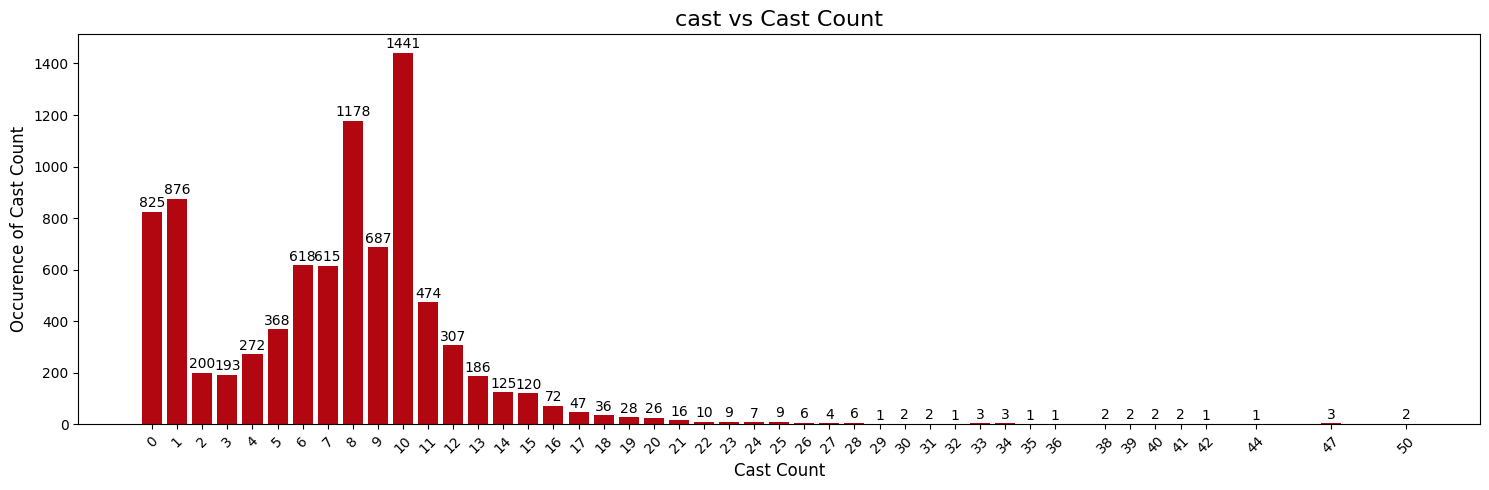

In [41]:
# cast vs Cast Count occurence
cast_data=data['cast_length'].value_counts()
cast_count=cast_data.index
cast_count_occurrence=cast_data.values
x_movie_cast=cast_count
y_movie_cast=cast_count_occurrence
title="cast vs Cast Count"
x_label="Cast Count"
y_label="Occurence of Cast Count"
plot_bar(x_movie_cast,y_movie_cast,x_label,y_label,title,60, True, 15,5)

/tmp/ipykernel_18/2582843217.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


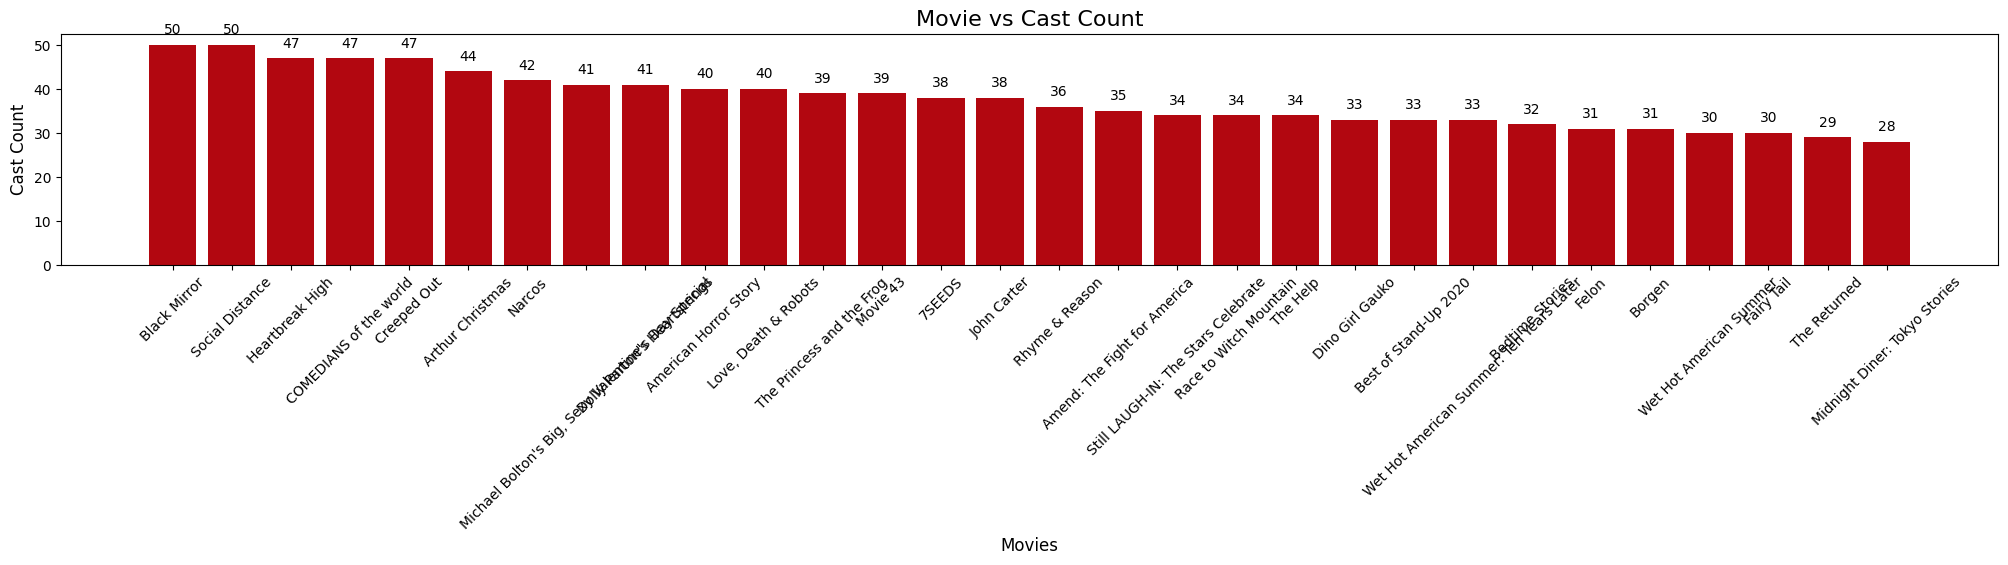

In [42]:
# No. Movie Cast vs Title
cast_title_data=data[['title', 'cast_length']].sort_values(by='cast_length',ascending=False)
cast_count=cast_title_data['cast_length'].head(30)
movie_title=cast_title_data['title'].head(30)
x_movie_cast=movie_title
y_movie_cast=cast_count
title="Movie vs Cast Count"
x_label="Movies"
y_label="Cast Count"
plot_bar(x_movie_cast,y_movie_cast,x_label,y_label,title,5, True, 25,3)

In [43]:
direc_group_cast_len=data[['director', 'cast_length']].groupby('director',as_index=False).agg({'cast_length':'sum'})
print(direc_group_cast_len)

                 director  cast_length
0             A. L. Vijay           14
1            A. Raajdheep            5
2               A. Salaam           10
3         A.R. Murugadoss           12
4         Aadish Keluskar            4
...                   ...          ...
4522          Çagan Irmak           10
4523     Ísold Uggadóttir            3
4524  Óskar Thór Axelsson           10
4525     Ömer Faruk Sorak           18
4526         Şenol Sönmez           16

[4527 rows x 2 columns]


In [44]:
direc_group_cast_len[direc_group_cast_len['director']=="No Data"]

,director,cast_length
3049,No Data,18561


In [45]:
# ek cast_length wale directors 356 hai
direc_group_cast_len.groupby('cast_length', as_index=False).size()

,cast_length,size
0,0,376
1,1,356
2,2,107
3,3,80
4,4,116
...,...,...
74,119,1
75,121,1
76,125,1
77,139,1


In [46]:
def plot_histogram(x_data=[], n_bins=10, title="", x_label="", y_label="", x_fig=5, y_fig=4 ):
    plt.figure(figsize=(x_fig,y_fig))
    
    plt.hist(x_data,bins=n_bins, color="#b20710",edgecolor='black')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.tight_layout()  
    plt.show()

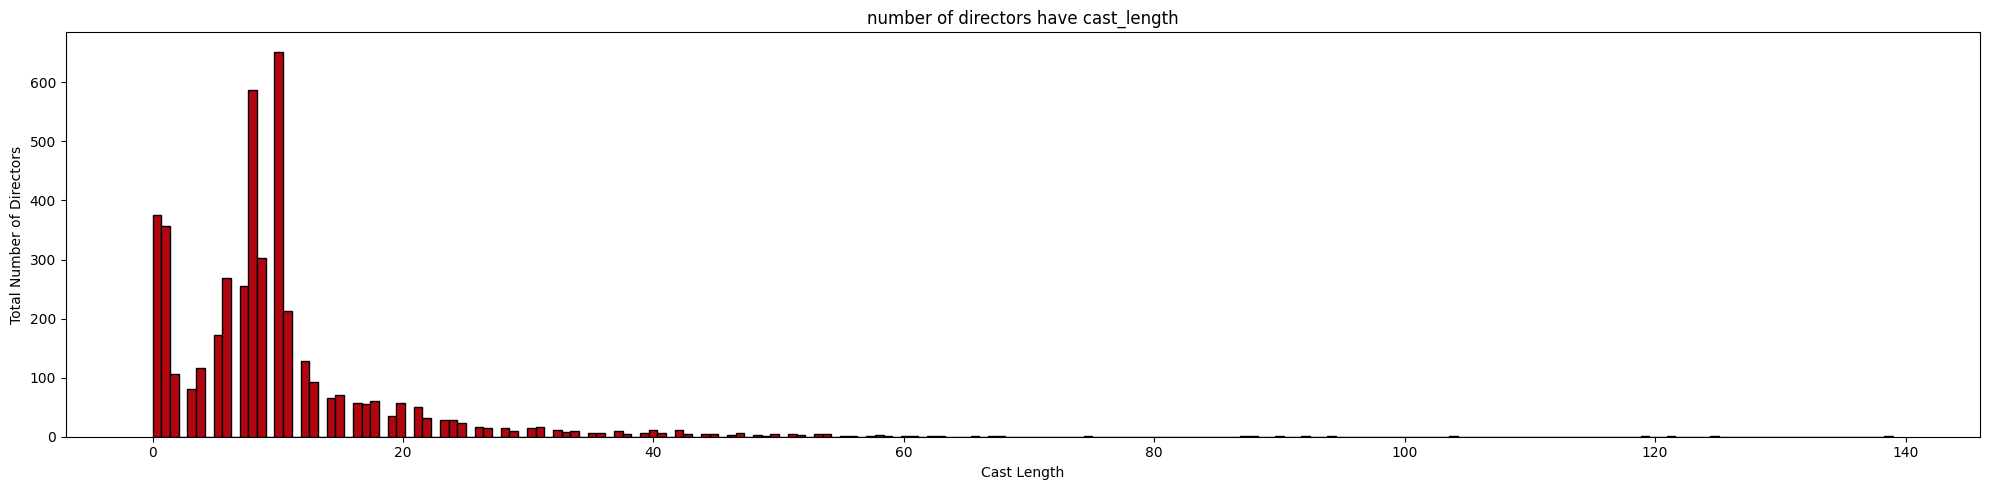

In [47]:
data_without_empty=direc_group_cast_len[direc_group_cast_len['director']!="No Data"]
#data_hist=data_without_empty[data_without_empty['cast_length']>10]
title='number of directors have cast_length'
x_label='Cast Length'
y_label='Total Number of Directors'
plot_histogram(data_without_empty['cast_length'].values, 200,title,x_label, y_label, 20,5)